# Titanic生存分析

## 数据集

数据集为1912年泰坦尼克号沉船事件中一些船员的个人信息以及存活状况。

- PassengerId	乘客编号
- Survived	乘客是否存活（0：NO，1：Yes）
- Pclass	乘客所在的船舱等级
- Name	乘客姓名
- Sex	乘客性别
- Age	乘客年龄
- SibSp	乘客的兄弟姐妹和配偶数量
- Parch	乘客的父母与子女数量
- Ticket	票的编号
- Fare	票价
- Cabin	座位号
- Embarked	乘客登船码头（C：Cherbourg，Q：Queenstown，S：Southampton）

# 逻辑回归

In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
titanic_cols <- cols(
    PassengerId = col_character(),
    Survived = col_integer(),
    Pclass = col_factor(levels = c('1', '2', '3')),
    Name = col_character(),
    Sex = col_factor(levels = c('male', 'female')),
    Age = col_double(),
    SibSp = col_integer(),
    Parch = col_integer(),
    Ticket = col_character(),
    Fare = col_double(),
    Cabin = col_character(),
    Embarked = col_factor(levels = c('C', 'Q', 'S'))
)
titanic <- read_csv('../Data/titanic.csv', col_names=T, col_types=titanic_cols)

## 进行探索性数据分析

In [3]:
summary(titanic)

 PassengerId           Survived      Pclass      Name               Sex     
 Length:891         Min.   :0.0000   1:216   Length:891         male  :577  
 Class :character   1st Qu.:0.0000   2:184   Class :character   female:314  
 Mode  :character   Median :0.0000   3:491   Mode  :character               
                    Mean   :0.3838                                          
                    3rd Qu.:1.0000                                          
                    Max.   :1.0000                                          
                                                                            
      Age            SibSp           Parch           Ticket         
 Min.   : 0.42   Min.   :0.000   Min.   :0.0000   Length:891        
 1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000   Class :character  
 Median :28.00   Median :0.000   Median :0.0000   Mode  :character  
 Mean   :29.70   Mean   :0.523   Mean   :0.3816                     
 3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu

## 构建逻辑回归模型

In [4]:
library(caret)
titanic_train_index <- createDataPartition(titanic$Survived, p=0.7, list=F)
titanic_train <- titanic[titanic_train_index, ]
titanic_test <- titanic[-titanic_train_index, ]

Loading required package: lattice
Warning message in as.POSIXlt.POSIXct(Sys.time()):
“unknown timezone 'default/Asia/Shanghai'”
Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [5]:
titanic_lr_model <- glm(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked,
                      family = binomial(link = 'logit'), data = titanic_train)

In [6]:
summary(titanic_lr_model)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + 
    Fare + Embarked, family = binomial(link = "logit"), data = titanic_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7207  -0.6317  -0.3390   0.6119   2.4693  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.344347   0.599765   3.909 9.28e-05 ***
Pclass2     -1.004538   0.405490  -2.477 0.013236 *  
Pclass3     -2.249356   0.426161  -5.278 1.30e-07 ***
Sexfemale    2.681837   0.276405   9.703  < 2e-16 ***
Age         -0.051390   0.010251  -5.013 5.36e-07 ***
SibSp       -0.621988   0.175277  -3.549 0.000387 ***
Parch       -0.128214   0.171740  -0.747 0.455330    
Fare         0.002883   0.003555   0.811 0.417340    
EmbarkedQ   -1.502182   0.749728  -2.004 0.045109 *  
EmbarkedS   -0.805886   0.325899  -2.473 0.013406 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

   

In [7]:
anova(titanic_lr_model, test = 'Chisq') %>% print

Analysis of Deviance Table

Model: binomial, link: logit

Response: Survived

Terms added sequentially (first to last)


         Df Deviance Resid. Df Resid. Dev  Pr(>Chi)    
NULL                       499     676.12              
Pclass    2   67.881       497     608.24 1.819e-15 ***
Sex       1  126.984       496     481.26 < 2.2e-16 ***
Age       1   20.724       495     460.53 5.304e-06 ***
SibSp     1   18.389       494     442.14 1.801e-05 ***
Parch     1    0.153       493     441.99   0.69537    
Fare      1    1.535       492     440.46   0.21537    
Embarked  2    7.569       490     432.89   0.02272 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## 评估模型

In [8]:
titanic_predicted_lr <- predict(titanic_lr_model, titanic_test, type = 'response')

In [9]:
library(pROC)

roc_res_lr <- roc(titanic_test$Survived, titanic_predicted_lr)

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



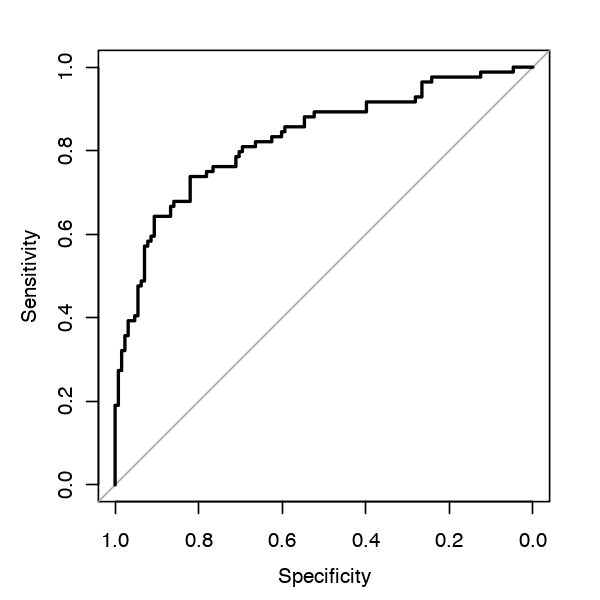

In [10]:
options(repr.plot.width=5, repr.plot.height=5)
plot(roc_res_lr)


Attaching package: ‘plotROC’

The following object is masked from ‘package:pROC’:

    ggroc



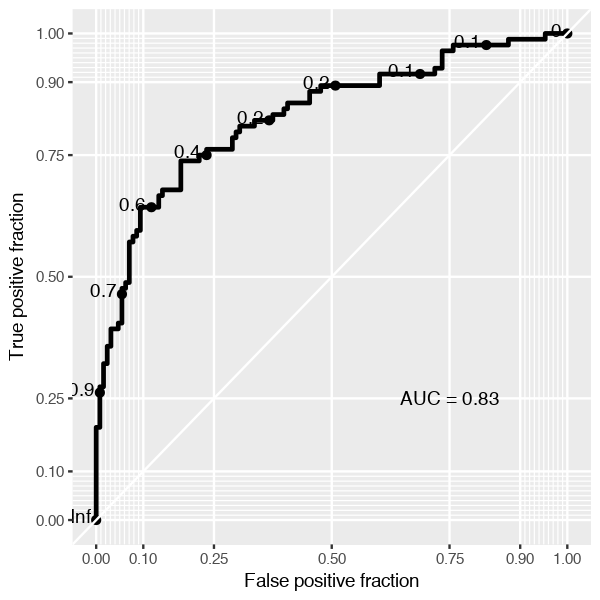

In [11]:
library(ggplot2)
library(plotROC)

roc_plt_df <- tibble(
    label = titanic_test$Survived,
    predicted = titanic_predicted_lr
)

options(repr.plot.width=5, repr.plot.height=5)

roc_plt <- ggplot(roc_plt_df, aes(d=label, m=predicted)) + 
    geom_roc() + style_roc(theme = theme_grey) + 
    annotate("text", x = .75, y = .25, 
            label = paste("AUC =", round(roc_res_lr$auc, 2)))
print(roc_plt)

# 决策树

## 构建逻辑回归模型

In [12]:
library(rpart)
titanic_train_ <- titanic_train
titanic_train_$Survived <- as.factor(titanic_train_$Survived)
titanic_dt_model_1 <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked,
                          data = titanic_train_)

In [13]:
print(titanic_dt_model_1)

n= 624 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 624 242 0 (0.61217949 0.38782051)  
   2) Sex=male 403  80 0 (0.80148883 0.19851117)  
     4) Age>=13 375  65 0 (0.82666667 0.17333333)  
       8) Fare< 26.26875 280  32 0 (0.88571429 0.11428571) *
       9) Fare>=26.26875 95  33 0 (0.65263158 0.34736842)  
        18) Fare>=26.775 84  25 0 (0.70238095 0.29761905)  
          36) Fare< 52.2771 43   8 0 (0.81395349 0.18604651) *
          37) Fare>=52.2771 41  17 0 (0.58536585 0.41463415)  
            74) Fare>=59.1896 28   8 0 (0.71428571 0.28571429) *
            75) Fare< 59.1896 13   4 1 (0.30769231 0.69230769) *
        19) Fare< 26.775 11   3 1 (0.27272727 0.72727273) *
     5) Age< 13 28  13 1 (0.46428571 0.53571429)  
      10) SibSp>=2.5 13   0 0 (1.00000000 0.00000000) *
      11) SibSp< 2.5 15   0 1 (0.00000000 1.00000000) *
   3) Sex=female 221  59 1 (0.26696833 0.73303167)  
     6) Pclass=3 101  49 0 (0.51485149 0.48514851)  
      12)

对于决策树的输出结果中，“split”表示节点的分割条件，“n”表示该节点的样本数量，“loss”为该节点错分的样本的数量，“yval”表示节点的分类标签，“yprob”表示节点中所有样本对应不同分类的频率。

用户可以利用plot()函数绘制生成的决策时，但默认的绘图函数的绘图效果差强人意，用户可以利用rpart.plot包中的rpart.plot()函数绘制生成更美观的决策树。

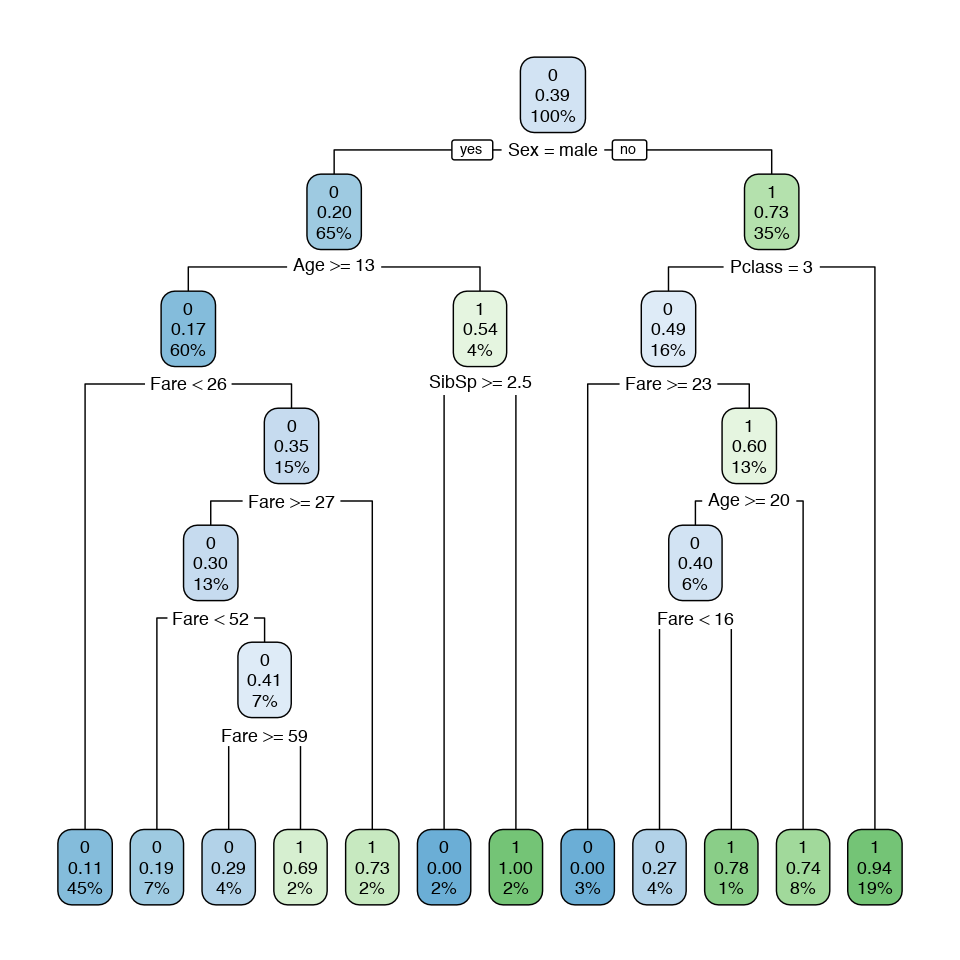

In [14]:
library(rpart.plot)

options(repr.plot.width=8, repr.plot.height=8)
rpart.plot(titanic_dt_model_1)

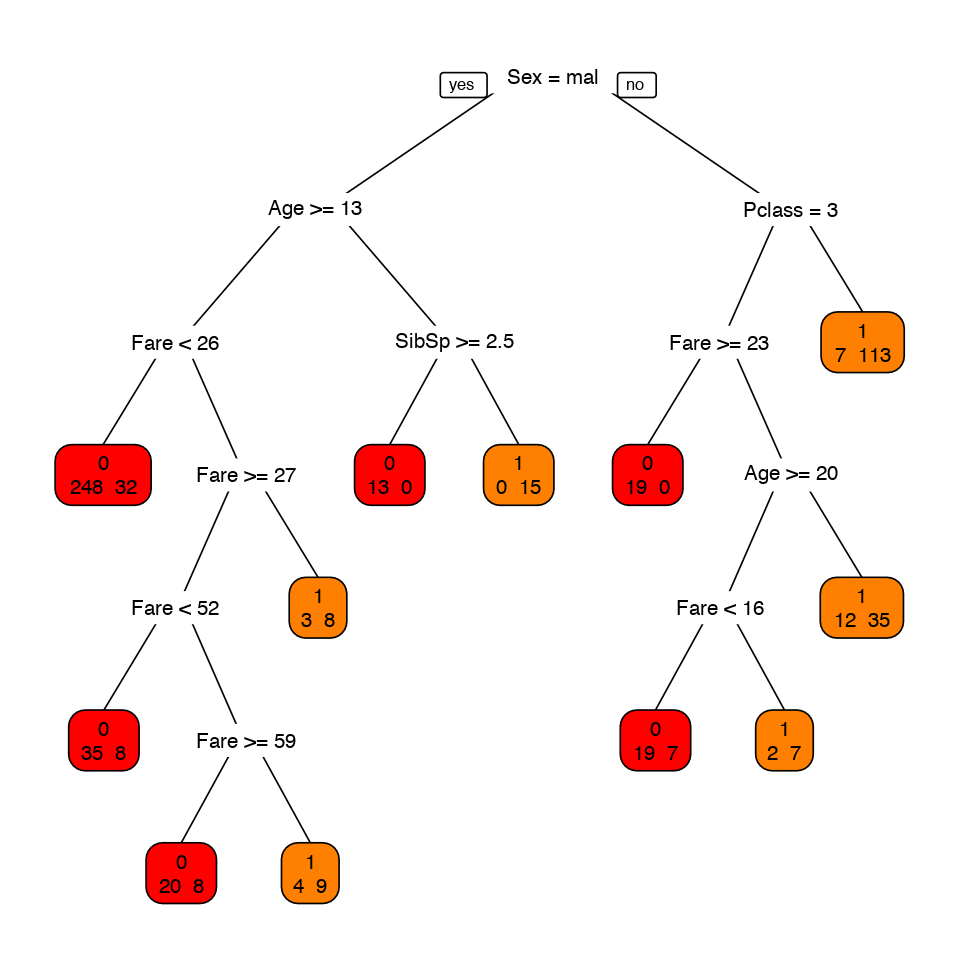

In [15]:
options(repr.plot.width=8, repr.plot.height=8)
prp(titanic_dt_model_1, extra=1, varlen=0, 
    box.col=heat.colors(3)[titanic_dt_model_1$frame$yval])

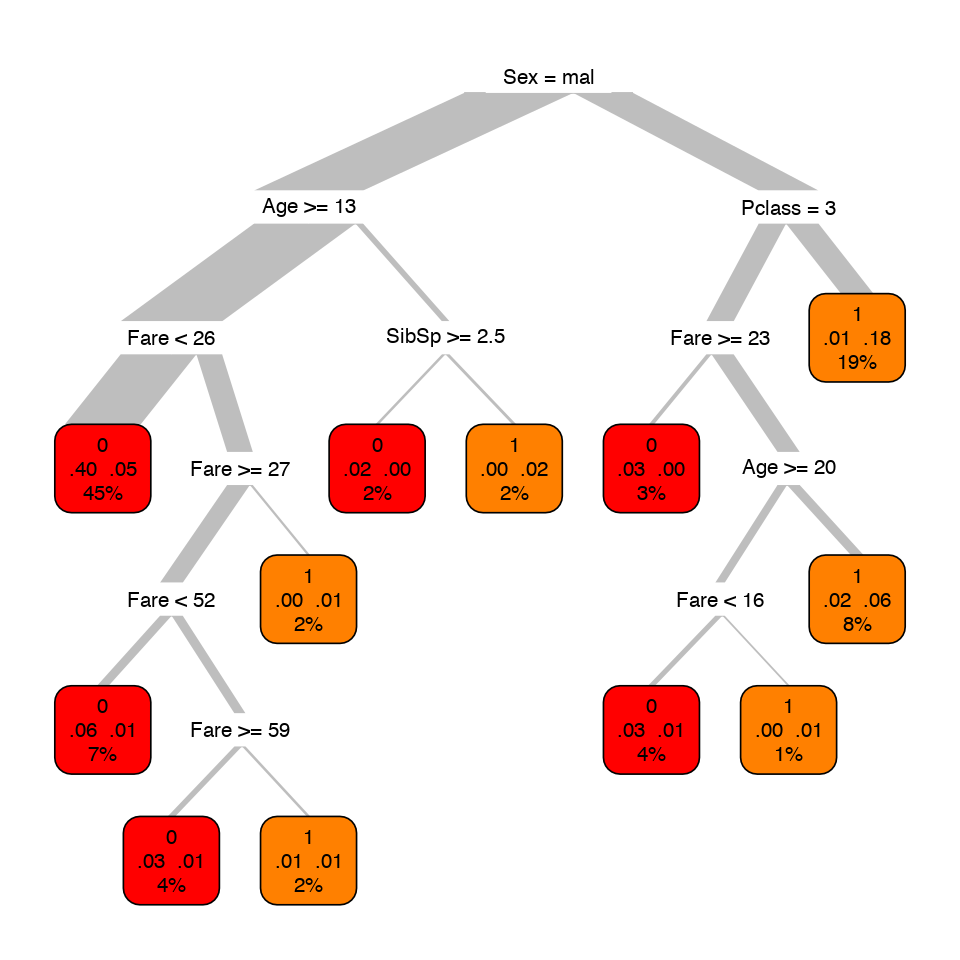

In [16]:
prp(titanic_dt_model_1, extra=109, branch.type=5, yesno=F, varlen=0,
    box.col=heat.colors(3)[titanic_dt_model_1$frame$yval])

## 评估模型

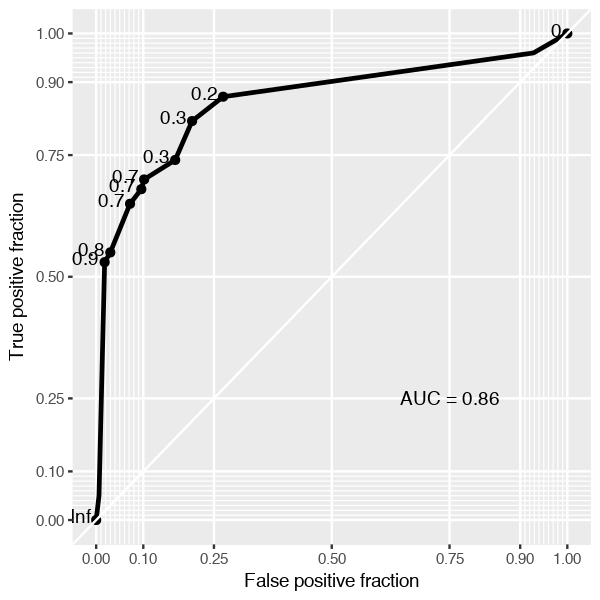

In [17]:
titanic_predicted_dt_1 <- predict(titanic_dt_model_1, titanic_test, type = 'prob')
roc_res_dt_1 <- roc(titanic_test$Survived, titanic_predicted_dt_1[, 2])

roc_plt_df <- tibble(
    label = titanic_test$Survived,
    predicted = titanic_predicted_dt_1[, 2]
)

options(repr.plot.width=5, repr.plot.height=5)

roc_plt <- ggplot(roc_plt_df, aes(d=label, m=predicted)) + 
    geom_roc() + style_roc(theme = theme_grey) + 
    annotate("text", x = .75, y = .25, 
            label = paste("AUC =", round(roc_res_dt_1$auc, 2)))
print(roc_plt)

## 剪枝

In [18]:
titanic_dt_model_2 <- prune(titanic_dt_model_1, cp = 0.02)

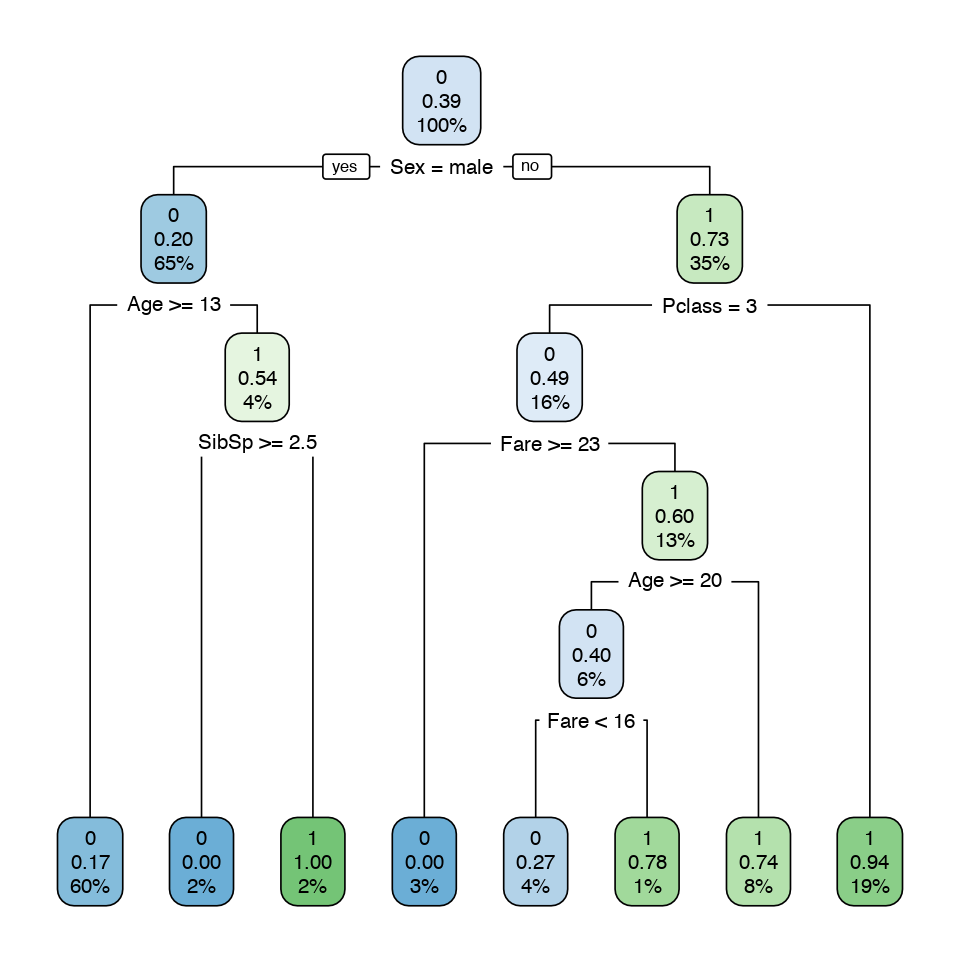

In [19]:
options(repr.plot.width=8, repr.plot.height=8)
rpart.plot(titanic_dt_model_2)

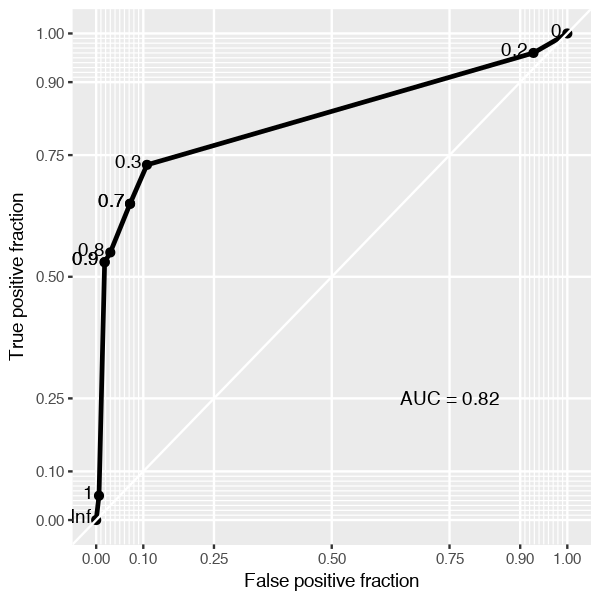

In [20]:
titanic_predicted_dt_2 <- predict(titanic_dt_model_2, titanic_test, type = 'prob')
roc_res_dt_2 <- roc(titanic_test$Survived, titanic_predicted_dt_2[, 2])

roc_plt_df <- tibble(
    label = titanic_test$Survived,
    predicted = titanic_predicted_dt_2[, 2]
)

options(repr.plot.width=5, repr.plot.height=5)

roc_plt <- ggplot(roc_plt_df, aes(d=label, m=predicted)) + 
    geom_roc() + style_roc(theme = theme_grey) + 
    annotate("text", x = .75, y = .25, 
            label = paste("AUC =", round(roc_res_dt_2$auc, 2)))
print(roc_plt)

# 模型结果比较

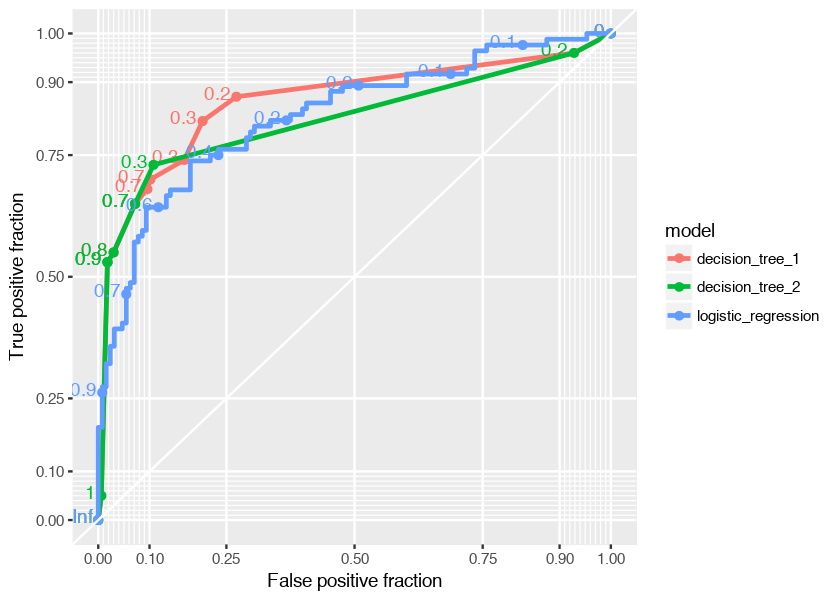

In [21]:
res_compare <- tibble(
    label = titanic_test$Survived,
    logistic_regression = titanic_predicted_lr,
    decision_tree_1 = titanic_predicted_dt_1[, 2],
    decision_tree_2 = titanic_predicted_dt_2[, 2]
)
res_compare_ <- gather(res_compare, model, predicted, -label)

options(repr.plot.width=7, repr.plot.height=5)

roc_plt <- ggplot(res_compare_, aes(d=label, m=predicted, color=model)) + 
    geom_roc() + style_roc(theme = theme_grey)
print(roc_plt)